In [1]:
import pandas as pd
import nltk
from matplotlib import pyplot as plt
from scrape_data import *
from process_text import *
from helper import *

In [ ]:
plot_profile('data scientist', max_words=200, first_n_postings=110)

In [ ]:
plot_profile('machine learning engineer', max_words=200, first_n_postings=110)

In [ ]:
plot_profile('data engineer', max_words=200, first_n_postings=120)

In [10]:
# Initialize the dict to store all tokens for below titles
tokens_dict = {}
titles = ['Data Scientist', 'Machine Learning Engineer', 'Data Engineer']
# Grab the tokens list and store them in the dict
for title in titles:
    tokens_dict[title] = plot_profile(title=title, first_n_postings=110, return_tokens=True)

In [11]:
# Make the dict of skills to investigate

languages = ['Python', 'R', 'SQL', 'Java', 'C', 'Cpp', 'CSharp', 'Scala',
             'Perl', 'Julia', 'Javascript', 'HTML', 'CSS'] 

big_data = ['Hadoop', 'MapReduce', 'Hive', 'Pig', 'Cascading', 'Scalding', 'Cascalog', 'HBase', 'Sqoop', 
            'Mahout', 'Oozie', 'Flume', 'ZooKeeper', 'Spark', 'Storm', 'Shark', 'Impala', 'Elasticsearch', 
            'Kafka', 'Flink', 'Kinesis', 'Presto', 'Hume', 'Airflow', 'Azkabhan', 'Luigi']

dl = ['TensorFlow', 'Keras', 'PyTorch', 'Theano', 'DeeplearningJ', 'Caffe', 'TFLearn', 'Torch', 
      'OpenCV', 'MXNet', 'Microsoft Cognitive Toolkit', 'Lasagne']

cloud = ['AWS', 'Google Cloud Platform', 'GCP', 'Azure']

ml = ['Natural Language Processing', 'NLP', 'Computer Vision', 'Voice Recognition', 
      'Recommendation Engine', 'Recommender', 'Chatbot', 'Fraud Detection', 'Sentiment Analysis']

dict_to_check = {'Programming Languages': languages,
                 'Big Data Technologies': big_data,
                 'Deep Learning Frameworks': dl,
                 'Cloud Computing Platforms': cloud,
                 'Machine Learning Application': ml}

In [12]:
# Check the frequency and store in dict
freq_dict = {}
for title in tokens_dict.keys():
    freq_dict[title] = check_freq(dict_to_check=dict_to_check, tokens=tokens_dict[title])

In [13]:
# Convert the dict to a pandas df
df = pd.DataFrame.from_dict({(i,j): freq_dict[i][j] 
                             for i in freq_dict.keys()
                             for j in freq_dict[i].keys()},
                            orient='index')
df.head()

python     r   sql  java     c  \
Data Engineer Big Data Technologies            NaN   NaN   NaN   NaN   NaN   
              Cloud Computing Platforms        NaN   NaN   NaN   NaN   NaN   
              Deep Learning Frameworks         NaN   NaN   NaN   NaN   NaN   
              Machine Learning Application     NaN   NaN   NaN   NaN   NaN   
              Programming Languages           39.0  16.0  55.0  41.0  11.0   

                                            cpp  csharp  scala  perl  julia  \
Data Engineer Big Data Technologies         NaN     NaN    NaN   NaN    NaN   
              Cloud Computing Platforms     NaN     NaN    NaN   NaN    NaN   
              Deep Learning Frameworks      NaN     NaN    NaN   NaN    NaN   
              Machine Learning Application  NaN     NaN    NaN   NaN    NaN   
              Programming Languages         5.0     0.0   17.0   3.0    0.0   

                                                   ...          azure  \
Data Engineer Big Data Technologies                ...            NaN   
              Cloud Computing Platforms            ...            6.0   
              Deep Learning Frameworks             ...            NaN   
              Machine Learning Application         ...            NaN   
              Programming Languages                ...            NaN   

                                            natural language processing  nlp  \
Data Engineer Big Data Technologies                                 NaN  NaN   
              Cloud Computing Platforms                             NaN  NaN   
              Deep Learning Frameworks                              NaN  NaN   
              Machine Learning Application                          0.0  4.0   
              Programming Languages                                 NaN  NaN   

                                            computer vision  \
Data Engineer Big Data Technologies                     NaN   
              Cloud Computing Platforms                 NaN   
              Deep Learning Frameworks                  NaN   
              Machine Learning Application              0.0   
              Programming Languages                     NaN   

                                            voice recognition  \
Data Engineer Big Data Technologies                       NaN   
              Cloud Computing Platforms                   NaN   
              Deep Learning Frameworks                    NaN   
              Machine Learning Application                0.0   
              Programming Languages                       NaN   

                                            recommendation engine  \
Data Engineer Big Data Technologies                           NaN   
              Cloud Computing Platforms                       NaN   
              Deep Learning Frameworks                        NaN   
              Machine Learning Application                    0.0   
              Programming Languages                           NaN   

                                            recommender  chatbot  \
Data Engineer Big Data Technologies                 NaN      NaN   
              Cloud Computing Platforms             NaN      NaN   
              Deep Learning Frameworks              NaN      NaN   
              Machine Learning Application          0.0      0.0   
              Programming Languages                 NaN      NaN   

                                            fraud detection  \
Data Engineer Big Data Technologies                     NaN   
              Cloud Computing Platforms                 NaN   
              Deep Learning Frameworks                  NaN   
              Machine Learning Application              0.0   
              Programming Languages                     NaN   

                                            sentiment analysis  
Data Engineer Big Data Technologies                        NaN  
              Cloud Computing Platforms                    NaN  
            

In [14]:
# Reset the index to include both title and category as columns
df = df.reset_index()
df.head()

,level_0,level_1,python,r,sql,java,c,cpp,csharp,scala,...,azure,natural language processing,nlp,computer vision,voice recognition,recommendation engine,recommender,chatbot,fraud detection,sentiment analysis
0,Data Engineer,Big Data Technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Engineer,Cloud Computing Platforms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Engineer,Deep Learning Frameworks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Engineer,Machine Learning Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Data Engineer,Programming Languages,39.0,16.0,55.0,41.0,11.0,5.0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Rename the first two columns
df.rename({'level_0': 'title', 'level_1': 'category'}, axis='columns', inplace=True)
df.head()

,title,category,python,r,sql,java,c,cpp,csharp,scala,...,azure,natural language processing,nlp,computer vision,voice recognition,recommendation engine,recommender,chatbot,fraud detection,sentiment analysis
0,Data Engineer,Big Data Technologies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data Engineer,Cloud Computing Platforms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Engineer,Deep Learning Frameworks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data Engineer,Machine Learning Application,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Data Engineer,Programming Languages,39.0,16.0,55.0,41.0,11.0,5.0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
l = df.columns.tolist()[2:] # the list of column names except the first two
# Transform from wide to long for plotting
df = pd.melt(df, id_vars=['title', 'category'], value_vars=l)
df.head()

,title,category,variable,value
0,Data Engineer,Big Data Technologies,python,NaN
1,Data Engineer,Cloud Computing Platforms,python,NaN
2,Data Engineer,Deep Learning Frameworks,python,NaN
3,Data Engineer,Machine Learning Application,python,NaN
4,Data Engineer,Programming Languages,python,39.0


In [17]:
# Rename the last two columns
df.rename({'variable': 'skill', 'value': 'frequency'}, axis='columns', inplace=True)
df.head()

,title,category,skill,frequency
0,Data Engineer,Big Data Technologies,python,NaN
1,Data Engineer,Cloud Computing Platforms,python,NaN
2,Data Engineer,Deep Learning Frameworks,python,NaN
3,Data Engineer,Machine Learning Application,python,NaN
4,Data Engineer,Programming Languages,python,39.0


In [18]:
# Subset to non null values in the freq column
df = df[df['frequency'].notnull()]
df.head()

,title,category,skill,frequency
4,Data Engineer,Programming Languages,python,39.0
9,Data Scientist,Programming Languages,python,86.0
14,Machine Learning Engineer,Programming Languages,python,57.0
19,Data Engineer,Programming Languages,r,16.0
24,Data Scientist,Programming Languages,r,73.0


In [19]:
# Reset the index
df.reset_index(drop=True, inplace=True)
df.head()

,title,category,skill,frequency
0,Data Engineer,Programming Languages,python,39.0
1,Data Scientist,Programming Languages,python,86.0
2,Machine Learning Engineer,Programming Languages,python,57.0
3,Data Engineer,Programming Languages,r,16.0
4,Data Scientist,Programming Languages,r,73.0


In [20]:
df = df.astype({'frequency': int})
df.dtypes

title        object
category     object
skill        object
frequency     int32
dtype: object

In [21]:
df.head()

,title,category,skill,frequency
0,Data Engineer,Programming Languages,python,39
1,Data Scientist,Programming Languages,python,86
2,Machine Learning Engineer,Programming Languages,python,57
3,Data Engineer,Programming Languages,r,16
4,Data Scientist,Programming Languages,r,73


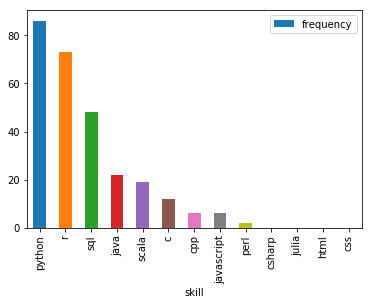

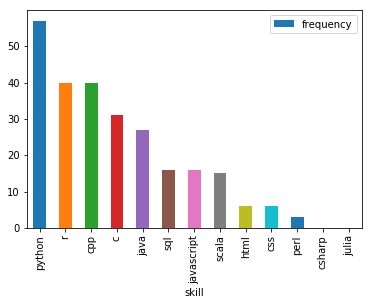

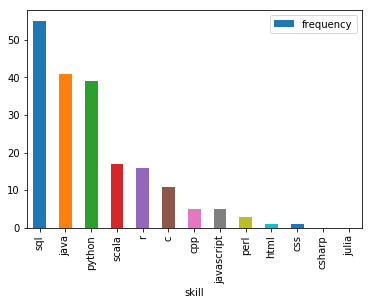

In [23]:
for title in titles:
    plot_skill(df=df, title=title, skill='Programming Languages')

In [ ]:
"""
with open('stopwords.csv', 'r', newline='') as f:
    reader = csv.reader(f)
    stop_list = list(reader)[0]
print(stop_list)
"""


"""
# Get the most frequent 300 tokens
freq = nltk.FreqDist(text)
tokens_top_300 = [i[0] for i in freq.most_common(300)]
# Save to a csv file for manual filtering
with open('stopwords_tmp.csv', 'w', newline='') as f:
     wr = csv.writer(f, quoting=csv.QUOTE_ALL)
     wr.writerow(tokens_top_300)
"""

## Todo's
- /
- add c# etc.
- show word context
- docstring and comments
- OOP
- single responsiblity principle for functions
- assumptions and limitations (sample representative...)